In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
import src.dev as dev
dev.reload_modules()

import src.render as render
from src.skeletal import Skeletal

# Configuramos del gráfico

In [3]:
viewport = render.Viewport(width=41.0, height=20.0)
render_args = {
    'viewport': viewport,
    'point_size': 0.2,
    'figsize': (10, 5),
}

# Creamos el esqueleto

In [4]:
skeletal = Skeletal()
skeletal.lengths = [1.0 for _ in range(20)]
skeletal.points = [[0.0, 0.0, 0.0]]
skeletal.points.extend([x, 0.0, 0.0] for x in itertools.accumulate(skeletal.lengths))

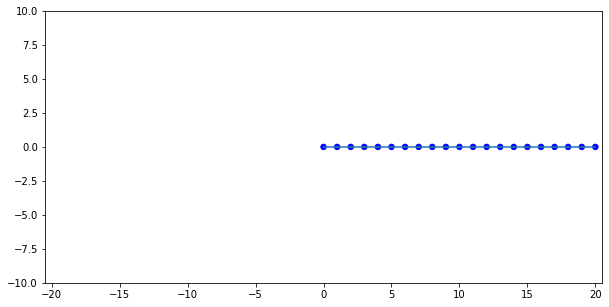

In [5]:
# Mostramos el esqueleto
skeletal.render(**render_args)

# Añadimos el objetivo

Puede hacer click en el gráfico para modificar la posición del objetivo

In [6]:
# Posición inicial del target. Puede modificarlo haciendo click en el gráfico.
target = [-14, 5, 0.0]

In [7]:
target

[-14, 5, 0.0]

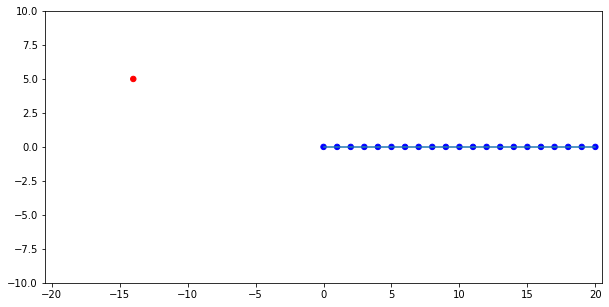

In [8]:
def target_on_click(event, args):
    global target
    target = [float(event.xdata), float(event.ydata), 0.0]
    skeletal.render(target=target, **args)
    
skeletal.render(target=target, on_click=target_on_click, **render_args)

# FABRIK

Se hace la cinematica inversa utilizando FABRIK.

Puede hacer click en el grafico para mover el objetivo.

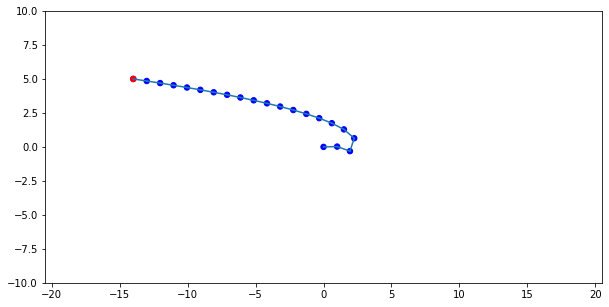

In [9]:
def fabrik_on_click(event, args):
    target = [float(event.xdata), float(event.ydata), 0.0]
    skeletal.fabrik(target).render(target=target, **args)
    
skeletal.fabrik(target).render(target=target, on_click=fabrik_on_click, **render_args)